## Download the data

In [2]:
import numpy as np
import pandas as pd
from load_housing_data import load_housing_data

housing = pd.read_csv(load_housing_data())

## Take a quick look at the data structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


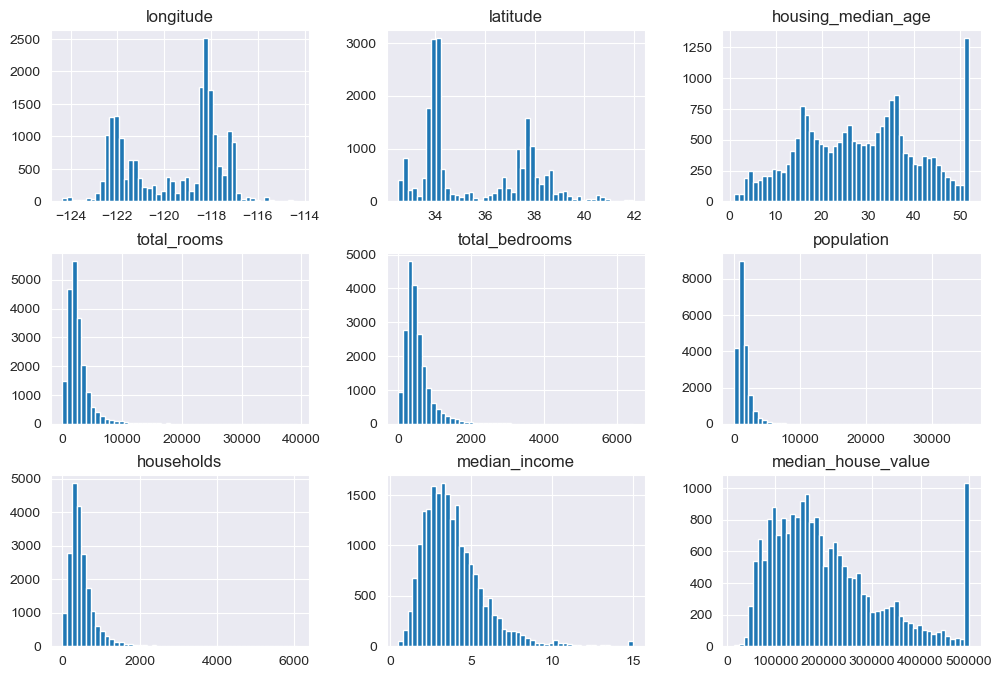

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

## Create a test set

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
# Using pd.cut(...) to create an income category with five categories
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

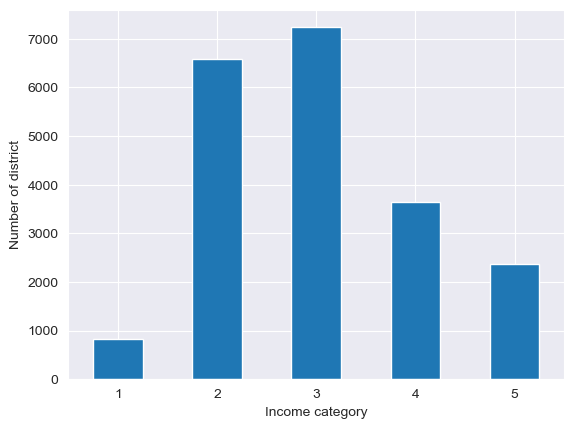

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of district")
plt.show()

In [11]:
# Using train_test_split with the stratify argument
# Ensuring that values are equally represented in each set
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [12]:
different_data_sets = {
    "data_set": housing, 
    "strat_train_set": strat_train_set, 
    "strat_test_set": strat_test_set
}

for name, current_set in different_data_sets.items():
    print(name)
    print(current_set["income_cat"].value_counts() / len(current_set))
    print()

data_set
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

strat_train_set
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

strat_test_set
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64



In [13]:
strat_train_set.drop("income_cat", inplace=True, axis=1)
strat_test_set.drop("income_cat", inplace=True, axis=1)

## Explore and visualize the data to gain insights

### Visualize geographical data

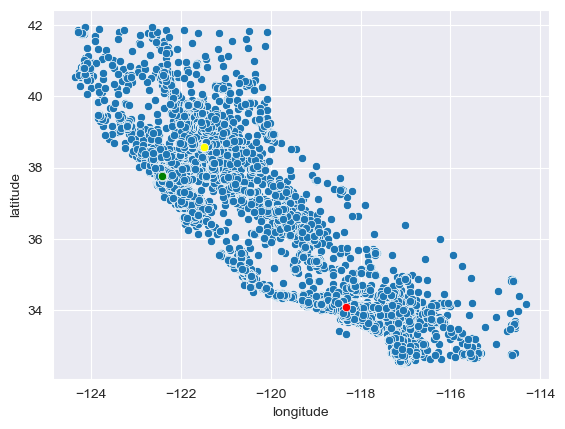

In [14]:
import seaborn as sns

# Scatterplot all the districts
sns.scatterplot(data=housing, x="longitude", y="latitude")
sns.scatterplot(x=[-118.32], y=[34.10], color="red") # Los Angeles
sns.scatterplot(x=[-122.42], y=[37.77], color="green") # San Francisco
sns.scatterplot(x=[-121.49], y=[38.58], color="yellow") # Sacramento
plt.grid(True)
plt.show()

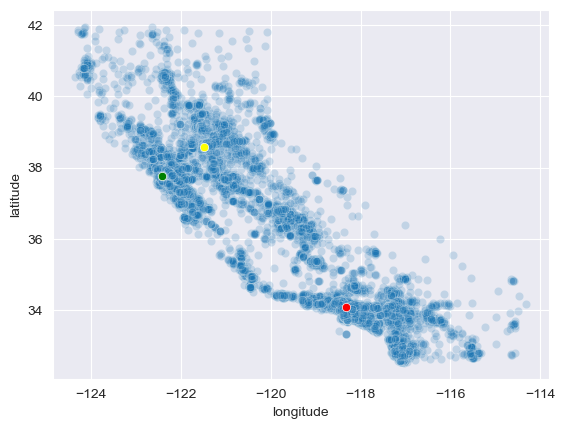

In [15]:
# Setting alpha to 0.2 makes it easier to spot the places with high density
sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.2)
sns.scatterplot(x=[-118.32], y=[34.10], color="red") # Los Angeles
sns.scatterplot(x=[-122.42], y=[37.77], color="green") # San Francisco
sns.scatterplot(x=[-121.49], y=[38.58], color="yellow") # Sacramento
plt.grid(True)
plt.show()

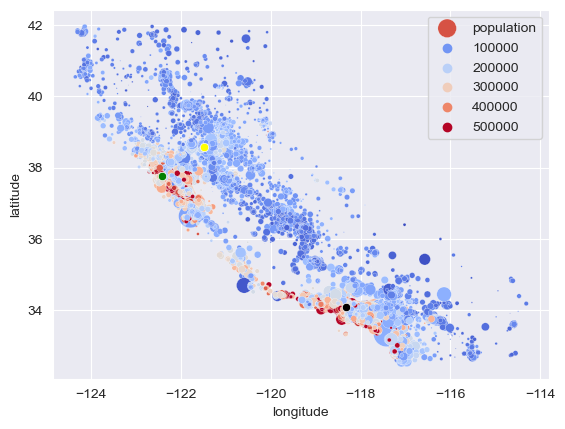

In [16]:
# Using param "s" to represent the district's population and "c" to represent the price
sns.scatterplot(data=housing, 
                x="longitude",
                y="latitude",
                s=housing["population"] / 100, # making sure dots are not too large
                label="population",
                hue="median_house_value",
                legend="auto",
                palette="coolwarm")
sns.scatterplot(x=[-118.32], y=[34.10], color="black") # Los Angeles
sns.scatterplot(x=[-122.42], y=[37.77], color="green") # San Francisco
sns.scatterplot(x=[-121.49], y=[38.58], color="yellow") # Sacramento
plt.grid(True)
plt.show()

### Look for correlations

In [17]:
# Calculate the Standard Correlation Coefficient
corr_matrix = housing.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

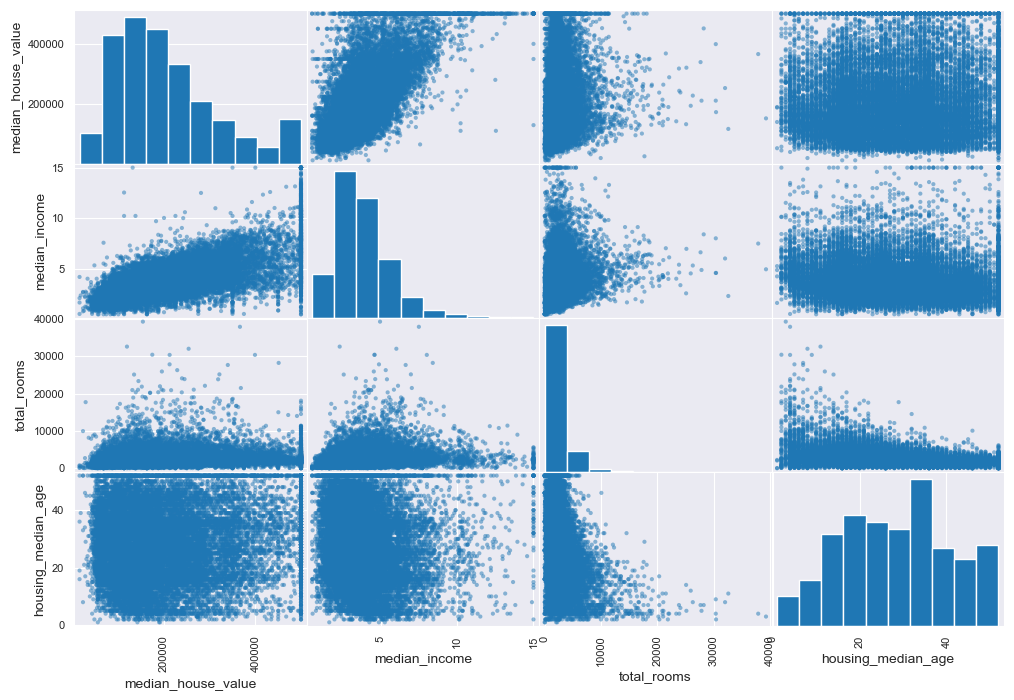

In [18]:
# Pick features that correlate nicely and scatterplot them
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.plot

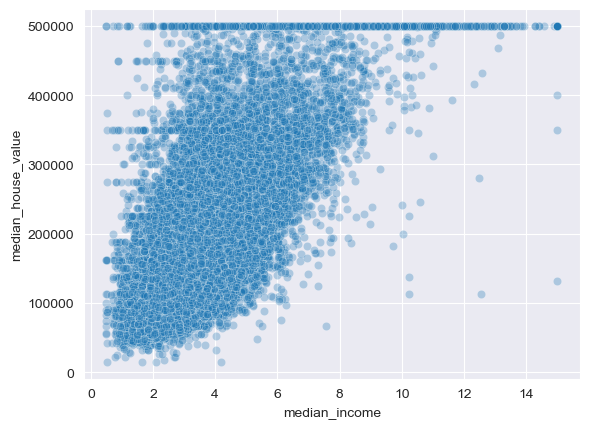

In [19]:
# Zoom into correlation between price and income
sns.scatterplot(data=housing, x="median_income", y="median_house_value", alpha=0.3)
plt.grid(True)
plt.show()

### Experiment with attribute combinations

In [20]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [21]:
corr_matrix = housing.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

## Prepare the data for machine learning algorithms

In [22]:
# Revert to a clean training set
housing = strat_train_set.drop(columns=['median_house_value'], axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Cleaning the data

In [23]:
# Option 1: Get rid of districts with missing bedroom data
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# Option 2: Get rid of the whole attribute
# housing.drop(columns=["total_bedrooms"], axis=1)

# Option 3: Set missing values to some value -> impute
# housing["total_bedrooms"].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number]) # select columns by datatype

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [25]:
# Using imputer to transform dataset by replacing empty values with the calculated median
X = imputer.transform(housing_num)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling text and categorical attributes

In [27]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [28]:
# Convert categorical attribute to number
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
# Using one-hot encoding to avoid the idea that ordering means similarity
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [31]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
# Using get_dummies() to convert each categorical feature into one-hot representation
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [35]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [36]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [37]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature scaling and transformation

In [38]:
# MinMax scaler normalizes the attributes (all values will be between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_min_max_scaled

array([[0.19574037, 0.55851064, 1.        , ..., 0.09649123, 0.19283181,
        0.11026055],
       [0.60547667, 0.16914894, 0.76470588, ..., 0.04066986, 0.06645511,
        0.38535331],
       [0.24036511, 0.61808511, 0.62745098, ..., 0.03429027, 0.03770767,
        0.1333154 ],
       ...,
       [0.73935091, 0.00425532, 0.23529412, ..., 0.17243283, 0.14168378,
        0.24563109],
       [0.60344828, 0.1606383 , 0.70588235, ..., 0.10563121, 0.15624417,
        0.25141722],
       [0.19675456, 0.54361702, 0.84313725, ..., 0.04165133, 0.03938772,
        0.19195597]])

In [39]:
# You can also provide a custom range - (-1,1) works best for most ML models
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [40]:
# StandardScaler standardizes the attributes (the mean value is 0 and std is 1)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

### Custom Tranformers

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


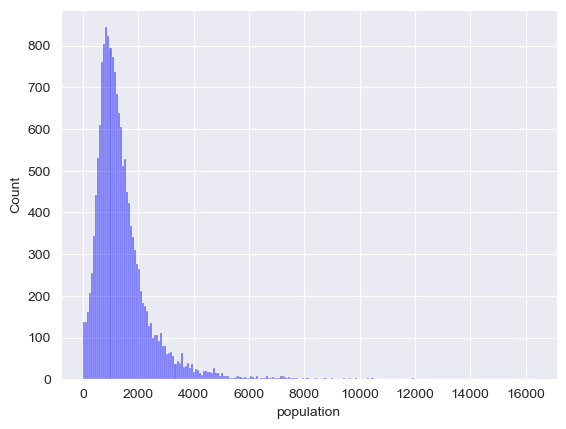

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


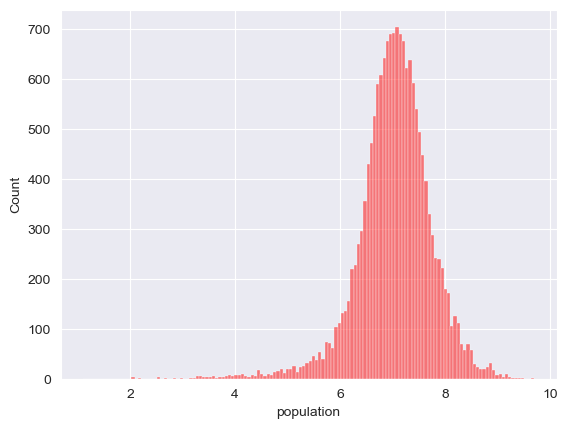

In [41]:
# Creating a log transformer for positive right-skewed features
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
df_log_housing = housing[["population"]]
log_pop = log_transformer.transform(df_log_housing)

sns.histplot(data=housing, x="population", color="blue", alpha=0.5)
plt.show()
sns.histplot(data=log_pop, x="population", color="red", alpha=0.5)
plt.show()

### Transformation Pipelines

In [42]:
from sklearn.pipeline import Pipeline
import sklearn

# Rendering scikit estimators as interactive diagram
sklearn.set_config(display="diagram")

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [43]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [44]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)
print(df_housing_num_prepared.info())
df_housing_num_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [45]:
# Using ColumnTransformer to handle numerical and categorical features with one pipeline
from sklearn.compose import ColumnTransformer

num_attributes = [
    "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"
]
cat_attributes = [ "ocean_proximity" ]

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

In [46]:
# Using the less verbose built-in support

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [47]:
housing_prepared = preprocessing.fit_transform(housing)

In [48]:
from cluster_similarity import ClusterSimilarity
from sklearn.pipeline import make_pipeline

# Putting all preparation steps together in one pipeline

def column_ratio(X):
    # Divide each element in the first column by the element in the second column
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature name out

def ratio_pipeline():
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("transformer", FunctionTransformer(column_ratio, feature_names_out=ratio_name)),
        ("scaler", StandardScaler())
    ])

log_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["longitude", "latitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [49]:
housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
preprocessing.get_feature_names_out()

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)


array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__ Cluster 0 similarity',
       'geo__ Cluster 1 similarity', 'geo__ Cluster 2 similarity',
       'geo__ Cluster 3 similarity', 'geo__ Cluster 4 similarity',
       'geo__ Cluster 5 similarity', 'geo__ Cluster 6 similarity',
       'geo__ Cluster 7 similarity', 'geo__ Cluster 8 similarity',
       'geo__ Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Select and train a model

### Train and evaluate on the training set

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)
housing_predictions = lin_reg.predict(housing)
print("Predictions  :", housing_predictions[:5].round(-2)) # rounded to the nearest hundred
print("Actual Values:", housing_labels.iloc[:5].values)

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Predictions  : [243200. 376100. 127800.  99900. 326000.]
Actual Values: [458300. 483800. 101700.  96100. 361800.]


In [55]:
from sklearn.metrics import mean_squared_error

# Let's see that linear regression model is not powerful enough - underfitting (high bias)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print("J =", lin_rmse.round(2))

J = 68603.04


In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)
print("Predictions  :", housing_predictions[:5].round(-2)) # rounded to the nearest hundred
print("Actual Values:", housing_labels.iloc[:5].values)

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Predictions  : [458300. 483800. 101700.  96100. 361800.]
Actual Values: [458300. 483800. 101700.  96100. 361800.]


In [57]:
# Let's see that decision tree model is (possibly) overfitting the data - high variance
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print("J =", tree_rmse.round(2))

J = 0.0


### Better evaluation using cross-validation

In [59]:
# Let's be sure by using cross-validation, we split the training set in 10 disjoint folds
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/clus

count       10.000000
mean     66724.042955
std       1985.491025
min      63881.416660
25%      65388.299342
50%      66442.029671
75%      67925.009341
max      70440.948727
dtype: float64

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmsess = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmsess).describe()

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/clus

count       10.000000
mean     47001.454340
std       1017.787333
min      45604.728644
25%      46546.721354
50%      47070.592583
75%      47320.304881
max      49181.435002
dtype: float64

## Fine-tune your model

### Grid search

In [67]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {
        "preprocessing__geo__n_clusters": [5, 8, 10],
        "random_forest__max_features": [4, 5, 8]
    },
    {
        "preprocessing__geo__n_clusters": [10, 15, 18],
        "random_forest__max_features": [6, 8, 10]
    }
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/clus

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('transformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_n...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x162b65650>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 5, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15, 18],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [68]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 18, 'random_forest__max_features': 6}

In [69]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,3.867276,0.186125,0.086291,0.000515,18,6,"{'preprocessing__geo__n_clusters': 18, 'random_forest__max_features': 6}",-42652.843768,-43377.076472,-44213.788234,-43414.569491,637.804150,1
16,4.857258,0.082892,0.086435,0.000050,18,8,"{'preprocessing__geo__n_clusters': 18, 'random_forest__max_features': 8}",-43253.255522,-43499.485225,-44313.523804,-43688.754851,453.070599,2
12,3.795595,0.109713,0.086326,0.000120,15,6,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}",-43479.769880,-43648.771674,-44678.259073,-43935.600209,529.652114,3
17,6.000485,0.212317,0.086498,0.000548,18,10,"{'preprocessing__geo__n_clusters': 18, 'random_forest__max_features': 10}",-43635.174411,-44103.181452,-44484.349359,-44074.235074,347.277932,4
13,4.859327,0.161114,0.086283,0.000314,15,8,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 8}",-43889.208511,-44101.425811,-45009.807492,-44333.480605,486.019608,5


### Randomized Search

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "preprocessing__geo__n_clusters": randint(low=3, high=50),
    "random_forest__max_features": randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=3,
                                scoring="neg_root_mean_squared_error",
                                random_state=42)
rnd_search.fit(housing, housing_labels)

/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreaslanderer/miniconda3/envs/HOML/lib/python3.11/site-packages/sklearn/clus

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('transformer',
                                                                                                FunctionTransformer(feature_names_out=<function r...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x162b65650>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30f60f750>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x177d58150>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [71]:
rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,5.702029,0.025983,0.108307,0.006853,45,9,"{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}",-41029.703845,-42064.516121,-42783.143480,-41959.121149,719.707678,1
8,4.515691,0.099470,0.107015,0.004377,32,7,"{'preprocessing__geo__n_clusters': 32, 'random_forest__max_features': 7}",-41515.356417,-42480.710513,-43124.113901,-42373.393610,661.141865,2
0,9.378838,0.280209,0.109118,0.003125,41,16,"{'preprocessing__geo__n_clusters': 41, 'random_forest__max_features': 16}",-42254.273468,-42736.131101,-43293.029560,-42761.144710,424.439093,3
5,3.248983,0.176379,0.113794,0.003087,42,4,"{'preprocessing__geo__n_clusters': 42, 'random_forest__max_features': 4}",-41782.189245,-43024.579951,-43721.857666,-42842.875621,802.222223,4
2,4.973826,0.056379,0.087231,0.000344,23,8,"{'preprocessing__geo__n_clusters': 23, 'random_forest__max_features': 8}",-42389.182753,-43041.860188,-43956.778857,-43129.273933,642.946477,5


### Analyze the best models and their errors

In [74]:
# Let's look at the relative importance of each feature to make predictions
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.19588758016488328, 'log__median_income'),
 (0.07937740064809197, 'cat__ocean_proximity_INLAND'),
 (0.06647528872571302, 'bedrooms__ratio'),
 (0.05354668139828992, 'rooms_per_house__ratio'),
 (0.05108667569494244, 'people_per_house__ratio'),
 (0.0351937240405, 'geo__ Cluster 3 similarity'),
 (0.027227822507240186, 'geo__ Cluster 22 similarity'),
 (0.020786910571925218, 'geo__ Cluster 6 similarity'),
 (0.02065376067808275, 'geo__ Cluster 17 similarity'),
 (0.019169182478043757, 'geo__ Cluster 32 similarity'),
 (0.017622998969062238, 'geo__ Cluster 2 similarity'),
 (0.015216578893015142, 'geo__ Cluster 7 similarity'),
 (0.014945229149739251, 'geo__ Cluster 21 similarity'),
 (0.01422204849033768, 'geo__ Cluster 41 similarity'),
 (0.013865667196201383, 'geo__ Cluster 40 similarity'),
 (0.013859799096766347, 'geo__ Cluster 43 similarity'),
 (0.013671048145399151, 'geo__ Cluster 34 similarity'),
 (0.013266442894432936, 'geo__ Cluster 18 similarity'),
 (0.013106807265273057, 'geo__ Cluster

### Evaluate your system on the test set

In [75]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41622.68617955769


In [76]:
# Compute the 95% confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39447.84732384, 43689.39632358])

## Launch, monitor, and maintain your system

In [77]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']